# Obtención de estadísticas descriptivas

In [42]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

1. Lectura de CSV

In [50]:
def readData():
    data = pd.read_csv("covid19_tweets.csv")
    return data

df = readData()
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


2. Información general

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74436 entries, 0 to 74435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         74436 non-null  object
 1   user_location     59218 non-null  object
 2   user_description  70079 non-null  object
 3   user_created      74436 non-null  object
 4   user_followers    74436 non-null  int64 
 5   user_friends      74436 non-null  int64 
 6   user_favourites   74436 non-null  int64 
 7   user_verified     74436 non-null  bool  
 8   date              74436 non-null  object
 9   text              74436 non-null  object
 10  hashtags          53002 non-null  object
 11  source            74424 non-null  object
 12  is_retweet        74436 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 6.4+ MB


In [45]:
df.describe(include = object).transpose()

,count,unique,top,freq
user_name,74436,44853,GlobalPandemic.NET,312
user_location,59218,14622,India,1496
user_description,70079,42690,Breaking News & Critical Information to SURVIV...,312
user_created,74436,45554,2010-07-13 21:58:05,312
date,74436,56546,2020-07-29 16:30:00,26
text,74436,74312,Greenland has no active cases of the novel cor...,6
hashtags,53002,23445,['COVID19'],16004
source,74424,450,Twitter Web App,22974


3. Número de favoritos por cuenta (verificada o no)

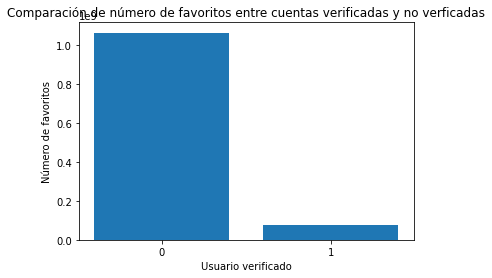

In [56]:
df2 = df.iloc[1:, [7,6]]
verified_favourites = df2.groupby(['user_verified'], as_index = False).agg('sum')
#verified_favourites
plt.bar(verified_favourites.user_verified, verified_favourites.user_favourites)
plt.title('Comparación de número de favoritos entre cuentas verificadas y no verficadas')
plt.xlabel('Usuario verificado')
plt.ylabel('Número de favoritos')
plt.xticks(verified_favourites.user_verified)
plt.show()

4. Número de seguidores por cuenta (verificada o no)

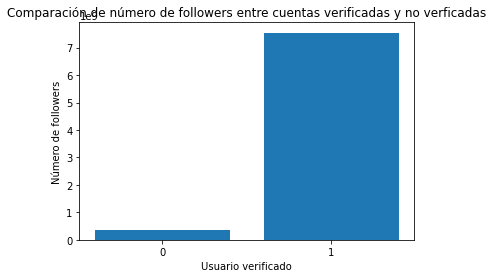

In [58]:
df3 = df.iloc[1:, [7, 4]]
verified_followers = df3.groupby(['user_verified'], as_index = False).sum()
#verified_followers
plt.bar(verified_followers.user_verified, verified_followers.user_followers)
plt.title('Comparación de número de followers entre cuentas verificadas y no verficadas')
plt.xlabel('Usuario verificado')
plt.ylabel('Número de followers')
plt.xticks(verified_followers.user_verified)
plt.show()

5. Número de favoritos por fuente

C:\Users\Guillermo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Guillermo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Guillermo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Guillermo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Guillermo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: G

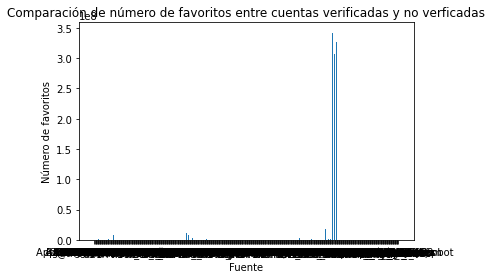

In [59]:
df4 = df.iloc[1:, [11,6]]
source_favourites = df4.groupby(['source'], as_index = False).sum()
#source_favourites
plt.bar(source_favourites.source, source_favourites.user_favourites)
plt.title('Comparación de número de favoritos entre cuentas verificadas y no verficadas')
plt.xlabel('Fuente')
plt.ylabel('Número de favoritos')
plt.xticks(source_favourites.source)
plt.show()

6. Tweets por país

In [49]:
dups_states = df.pivot_table(columns = ['user_location'], aggfunc = 'size')
dups_states


user_location
\nˢᵒᵐᵉʷʰᵉʳᵉ\n🖤         2
                       8
     Cathlamet, Wa.    1
   Canada 🇨🇦🍁🛶🌲        1
   WorldWide           1
                      ..
🤡 🌎                    1
🥰🥰                     1
🦄                      1
🦄🌈❤️🧡💛💚💙💜🌈🦄            2
🪐                      4
Length: 14622, dtype: int64